## Image pyramid

 **create a series of images of different sizes that represent the same image at different scales**

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import fftpack
import scipy.stats as st

In [13]:
img = cv2.imread('motorcycle.bmp')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    
img2= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [17]:
class Pyramid:
      
        def __init__(self):
            self.x = None
            self.pyramid=None
            self.Lpyramid=None
             
        def scaleDownImage(self,image):
            return image[0:image.shape[0]:2, 1:image.shape[1]:2]
         
        def scaleUpImage(self,image):
            return np.insert(np.insert(image, np.arange(1, image.shape[0]+1), 0, axis=0), np.arange(1,image.shape[1]+1), 0, axis=1)
        
        def fft(self,img):            
            fft2_img = np.fft.fft2(img)
            fftshift_img = np.fft.fftshift(fft2_img) 
            magnitude_spectrum = 20*np.log(1e-10 + np.abs(fftshift_img)).astype(np.uint8)             
            return magnitude_spectrum
        
        def Pass(self, im1):
            im = im1.copy()
            pyramid= [im]
            for i in range(4):
                im = cv2.pyrDown(im)
                pyramid.append(im)
                
            im2 = pyramid[3]
            laplacian_pyramid = [im2]
            
            
            for i in range(4, 0, -1):
                size = pyramid[i-1].shape[:2][::-1]
                gaussian_extended = cv2.pyrUp(pyramid[i],dstsize = size)
                im2 = pyramid[i-1]- gaussian_extended
                laplacian_pyramid.append(im2)                
            
            self.pyramid=pyramid
            self.Lpyramid=laplacian_pyramid
            
            fig,a =  plt.subplots(2,5,figsize=(40,10))
            for i in range(5):
                a[0][i].imshow(pyramid[i])
                a[1][i].imshow(laplacian_pyramid[::-1][i])
                
            
                
        def FFT(self, im1):
            self.Pass(im1)
            freq_gaussian = list(map(self.fft,self.pyramid))
            freq_laplacian = list(map(self.fft,self.Lpyramid[::-1]))
            fig,a =  plt.subplots(2,5,figsize=(40,10))
            
            for i in range(5):
                a[0][i].imshow(freq_gaussian[i],cmap =  'gray')
                a[1][i].imshow(freq_laplacian[i],cmap =  'gray')

##  Next, we define a function to scale down the input image that we can make use of to construct the pyramid.
## The images are scaled down by discarding all the even rows and columns, thus, getting an image 1/4th the size.

## We follow this up by defining a function to scale up the image.
## This is done by injecting rows and columns of zeros after each row and column in the existing image. 
## Then we apply our Gaussian Filter method as defined earlier and Multiply it by 4.

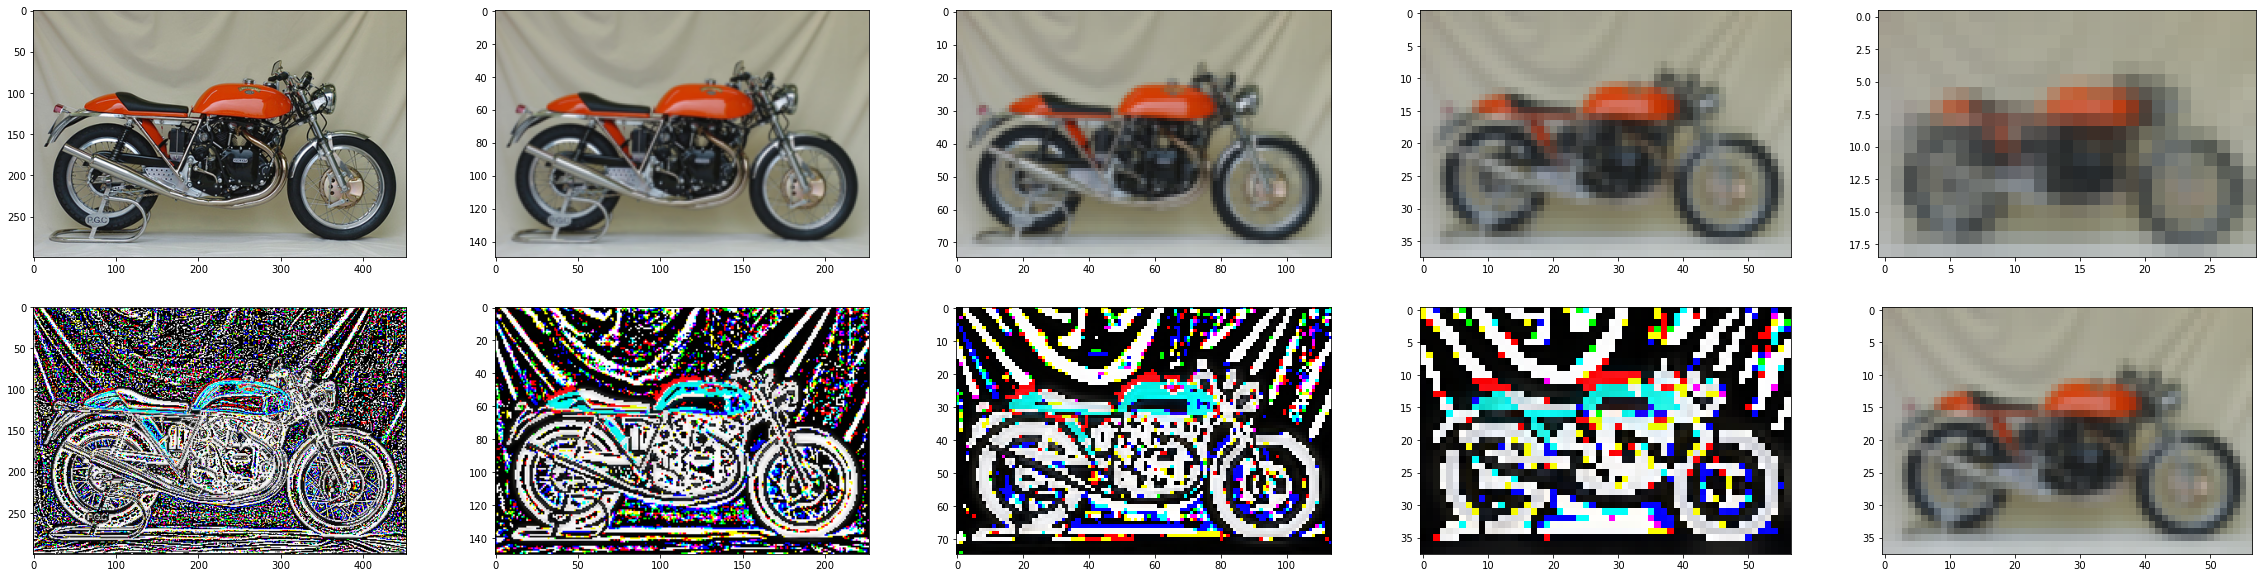

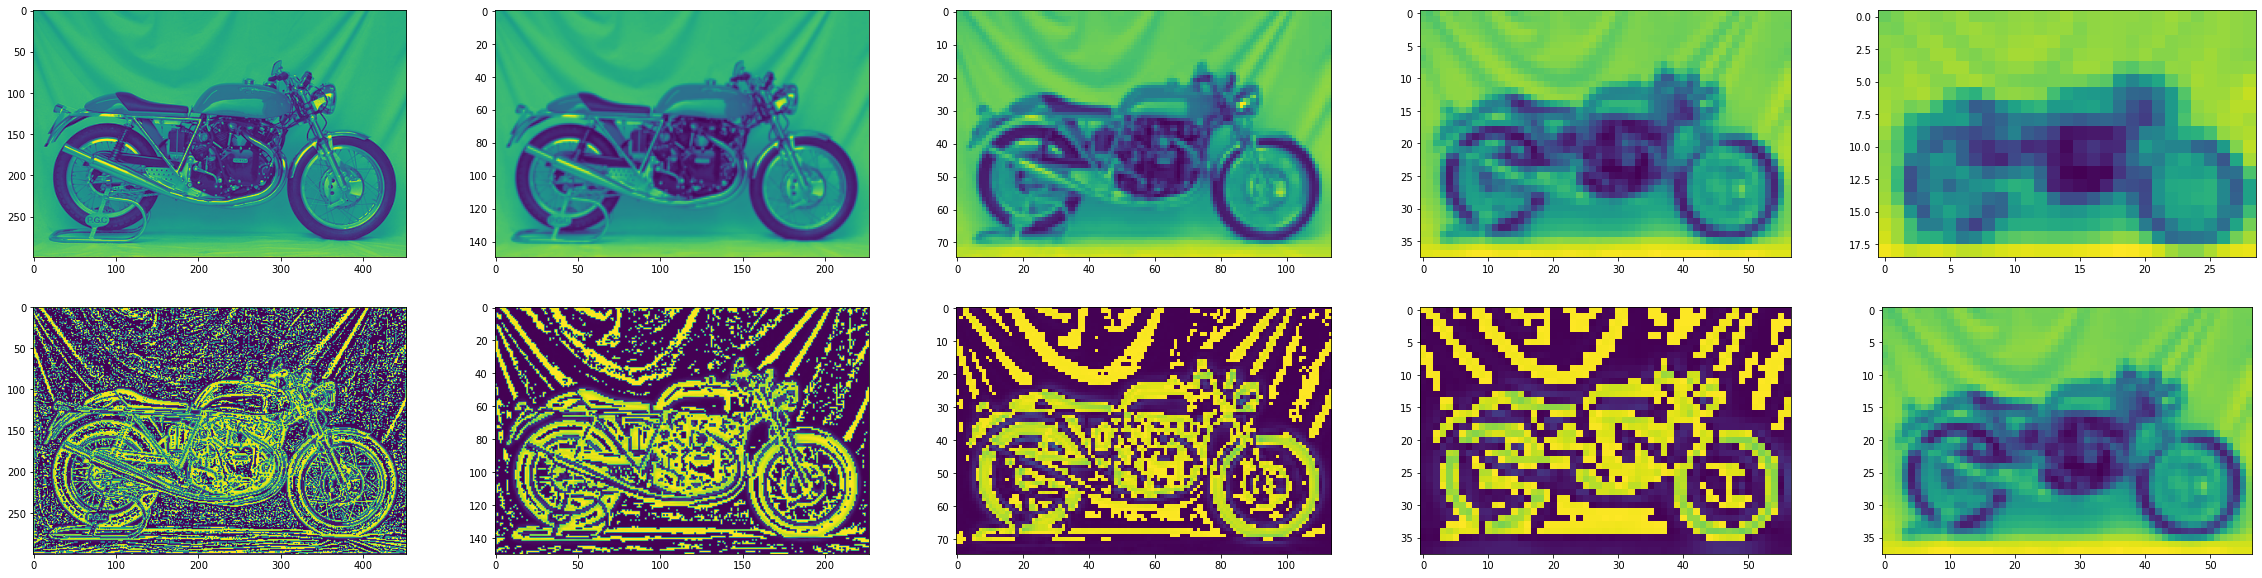

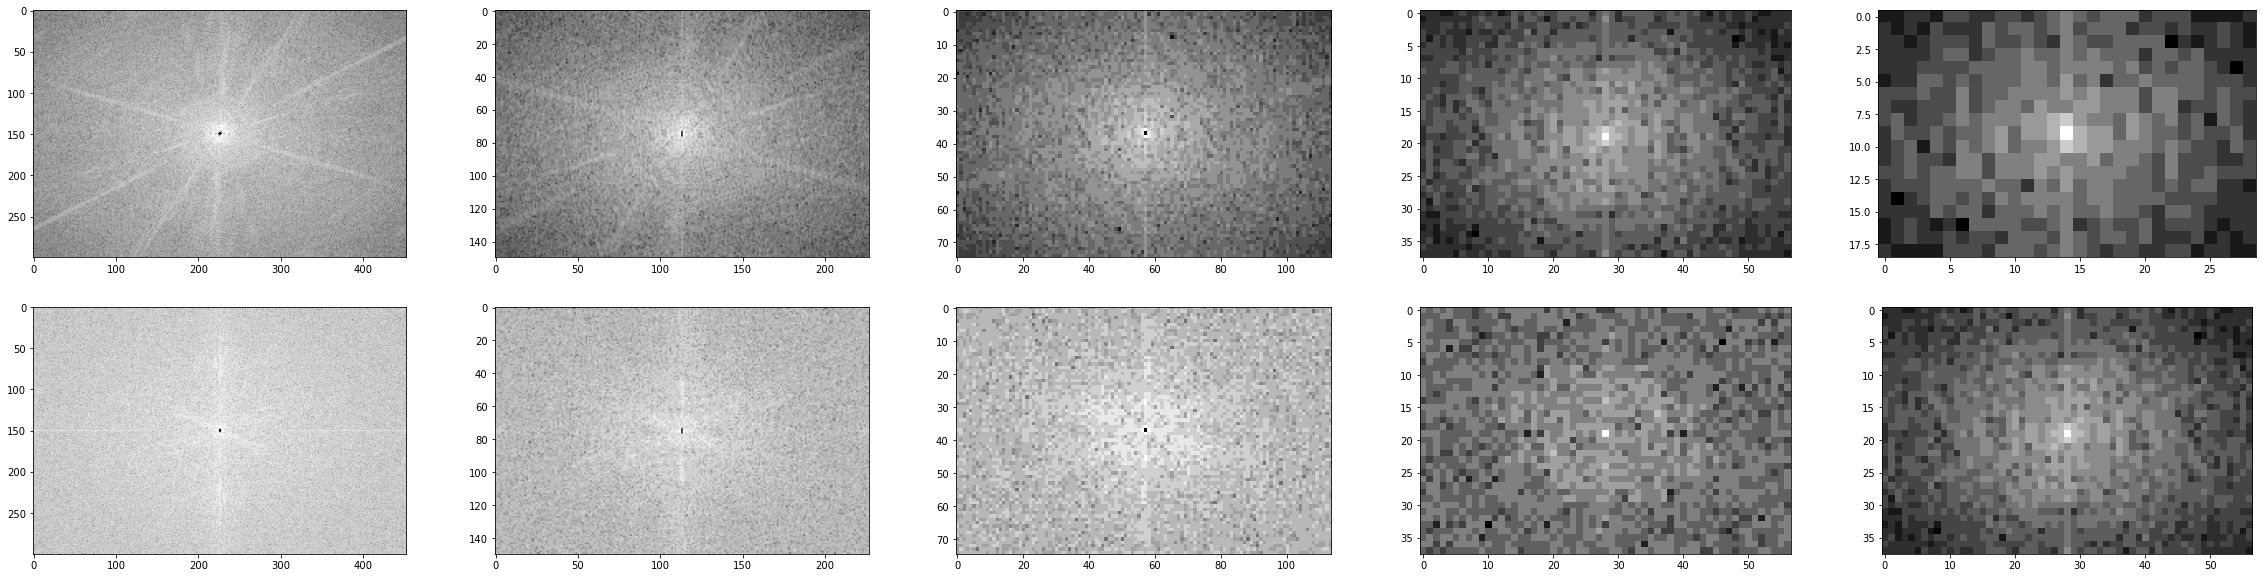

In [18]:
model=Pyramid()
model.Pass(img1)
model.FFT(img2)